In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

2.7.0


In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt #used later

In [4]:
#familiarizing myself with dataset
len(x_train)

60000

In [5]:
len(x_test) #70000 total with 10000 being used for testing

10000

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
x_train.shape

(60000, 28, 28)

4


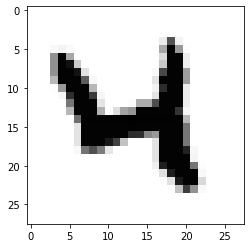

In [9]:
img_index = 20 #checking arbitrary number from 0 to 60000
print(y_train[img_index]) #using matplotlib to visualize an entry

plt.imshow(x_train[img_index],cmap='Greys')

In [10]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) #making the array 4 dimentions to work with keras
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
                        
input_shape = (28, 28, 1)
                        
x_train = x_train.astype('float32') #values must be floats so division will result in decimals
x_test = x_test.astype('float32')
                        
# modifying RGB codes by dividing it to the max RGB value/ "normalizing"
x_train = x_train/255
x_test /= x_test/255

<ipython-input-10-666fdc60224d>:11: RuntimeWarning: invalid value encountered in true_divide
  x_test /= x_test/255


In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
x_train.shape[0]

60000

In [13]:
x_test.shape[0]

10000

In [14]:
#needed keras modules
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

model = Sequential() #making a sequential model
model.add(Conv2D(28,input_shape=input_shape,kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # flattening 2D arrays for fully connected layers
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) 
#using adam optimizer here

model.fit(x=x_train,y=y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2042 - accuracy: 0.9394
Epoch 2/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0815 - accuracy: 0.9753
Epoch 3/8
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0577 - accuracy: 0.9820
Epoch 4/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0473 - accuracy: 0.9846
Epoch 5/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0349 - accuracy: 0.9888
Epoch 6/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0290 - accuracy: 0.9902
Epoch 7/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0249 - accuracy: 0.9917
Epoch 8/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0216 - accuracy: 0.9923


In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0980


[nan, 0.09799999743700027]

0


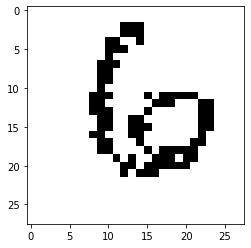

In [17]:
img_index = 100
plt.imshow(x_test[img_index].reshape(28, 28),cmap='Greys')

pred = model.predict(x_test[img_index].reshape(1, 28, 28, 1)) #sample
print(pred.argmax()) 

In [18]:
#Works well, about 98% accuracy